In [1]:
import io
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
import numpy as np

In [2]:
plt.rcParams['figure.figsize']  = (16, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

In [3]:
plt.ion()
plt.style.use('seaborn-colorblind')

In [4]:
conn = sqlite3.connect('sql/sql.db')
cursor = conn.cursor()

In [5]:
#Executar só uma vez a cada vez que abrir o colab
f = io.open('sql/trabalho.sql', 'r', encoding='ISO-8859-1')
sql = f.read()
cursor.executescript(sql)

OperationalError: table ANSWERS already exists

Modelo relacional
<img src="diagrama/diagrama.png">

In [6]:
def boostreap(p,n_size = 500):
    values = np.zeros(n_size)
    
    d = pd.DataFrame(p)
    
    for i in range(n_size):
        sample = d[0].sample(replace = True,n = len(p))
        values[i] = sample.mean()
        
    return values

In [7]:
def gerarB(selecionados,df,n_size=500):
    p = []
    for country in selecionados:
        pais = df[df["COUNTRYCODE"] == country]

        for x in range(pais.shape[0]):
            sample = pais.iloc[x]
            for _ in range(int(sample["TAMANHO"])):
                p.append(sample["VALUE"])

    b = boostreap(p,n_size=n_size)
    
    return b

In [9]:
query = """
Select *
From PESOS NATURAL JOIN ANSWERS NATURAL JOIN SIZE
WHERE SUBSET == TIPO

"""

df = pd.read_sql_query(query,conn)
df["TAMANHO"] = df["PERCENTAGE"] * df["VALOR"] * 0.01
df

,QC,ANSWER,VALUE,COUNTRYCODE,SUBSET,PERCENTAGE,NOTES,TIPO,VALOR,TAMANHO
0,e1,Yes,0.0,0,LESBIAN,33,NULL,LESBIAN,437,144.21
1,e1,No,1.0,0,LESBIAN,53,NULL,LESBIAN,437,231.61
2,e1,Don`t know,0.5,0,LESBIAN,2,[0],LESBIAN,437,8.74
3,e1,Yes,0.0,0,GAY,51,NULL,GAY,1558,794.58
4,e1,No,1.0,0,GAY,25,NULL,GAY,1558,389.50
...,...,...,...,...,...,...,...,...,...,...
4703,fb2_6,More perpetrators,0.0,11,BIM,65,NULL,BIM,294,191.10
4704,fb2_6,Don`t know,0.5,11,BIM,3,[0],BIM,294,8.82
4705,fb2_6,Alone,1.0,11,TRANS,31,NULL,TRANS,813,252.03
4706,fb2_6,More perpetrators,0.0,11,TRANS,65,NULL,TRANS,813,528.45


In [10]:
subset = df["SUBSET"].unique()

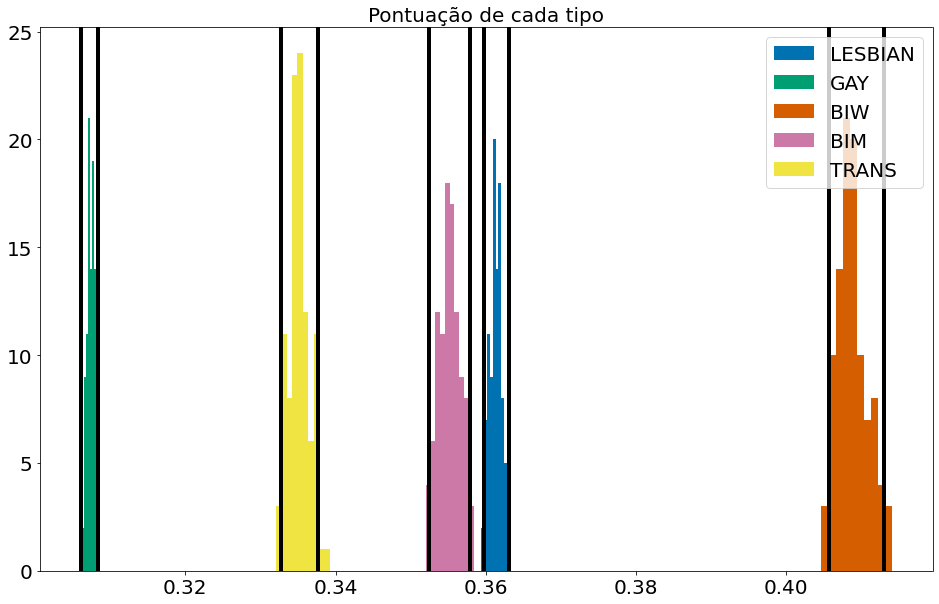

In [27]:
for i in subset:
    sample1 = df[df["SUBSET"] == i]
    p = sample1["COUNTRYCODE"].unique()
    
    boot1 = gerarB(p,sample1,100)
    
    plt.hist(boot1,label=i)
    inf = np.percentile(boot1,2.5)
    sup = np.percentile(boot1,97.5)
    plt.axvline(inf,color="black")
    plt.axvline(sup,color="black")
    plt.legend()
    
    
plt.title("Pontuação de cada tipo")
plt.show()